In [1]:
%matplotlib inline
from pyvista import set_plot_theme
set_plot_theme('document')

In [2]:
# Import necessary libraries
import gempy as gp
import gempy_viewer as gpv


# sphinx_gallery_thumbnail_number = 2

Setting Backend To: AvailableBackends.numpy


In [3]:
data_path = 'Modeling_data/'
# Create a GeoModel instance
data = gp.create_geomodel(
    project_name='3d-test',
    extent=[0, 100, 0, 100, -100, 0],
    refinement=6,
    importer_helper=gp.data.ImporterHelper(
        path_to_orientations=data_path + "test_vect.csv",
        path_to_surface_points=data_path + "Test_points.csv"
    )
)
# Map geological series to surfaces
gp.map_stack_to_surfaces(
    gempy_model=data,
    #Нужен правильный порядок 
    mapping_object={"Kimberlite": 'kimb1',
                    "Strat_Series": ('layer1', 'layer2')
                   }
)

StructuralFrame(
	structural_groups=[
StructuralGroup(
	name=Kimberlite,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=kimb1,
	color=#015482,
	is_active=True
)
]
),
StructuralGroup(
	name=Strat_Series,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=layer1,
	color=#9f0052,
	is_active=True
),
Element(
	name=layer2,
	color=#ffbe00,
	is_active=True
)
]
)
],
	fault_relations=
[[False, False],
 [False, False]],

In [5]:
# Compute the geological model
geo_data = gp.compute_model(data)

Setting Backend To: AvailableBackends.numpy
Chunking done: 18 chunks
Chunking done: 13 chunks
Chunking done: 18 chunks
Chunking done: 12 chunks


In [41]:
# gpv.plot_2d(geo_data, direction=['y'], show_results=False)

# Plot the result of the model in the x and y direction with data and without boundaries
# gpv.plot_2d(geo_data, direction=['x'], show_data=True, show_boundaries=False)
# gpv.plot_2d(geo_data, direction=['y'], show_data=True, show_boundaries=False)
gpv.plot_3d(data, Image=False)

In [8]:
geo_data.raw_arrays.lith_block.shape

(262144,)

In [12]:
data.grid._octree_grid.resolution

array([64, 64, 64])

In [44]:
import numpy as np
result_model = np.reshape(geo_data.raw_arrays.lith_block, data.grid._octree_grid.resolution)
np.save('Results/test_model', result_model)

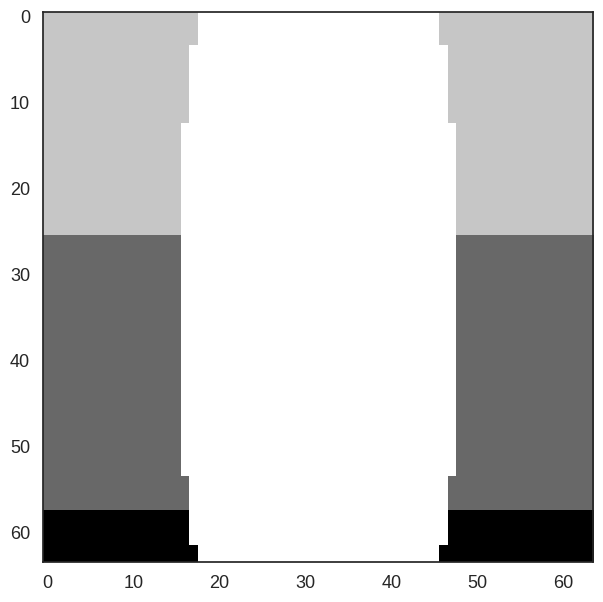

In [40]:
import matplotlib.pyplot as plt
import matplotlib as mpl

fig, ax1 = plt.subplots()
ax1.imshow(np.flip(np.transpose(result_model[:,43,:])))